# 시나리오
- 다항회귀로 농어의 무게를 예측할 수 있음
- 훈련데이터셋보다 테스트데이터셋의 평가점수가 높은 것이 문제로 보임
- 두 번째 특성으로 길이의 제곱 대신 다른 고차항을 넣어야 할 것으로 생각됨

### 해결방법
- 현재 데이터를 확인하면 높이와 두께정보도 있음
- 선형회귀는 특성이 많을수록 효과가 좋음
- 준비된 데이터 모두(높이와 두께)를 사용하도록 한다.


# 다중회귀(Multiple Regression)
- 2개 이상의 특성을 이용하는 회귀 분석

### 차원 개념
- 1개의 특성을 사용하면 직선
- 2개의 특성을 사용하면 평면(곡선)
- 3개의 특성을 사용하면 3차원(표현이 어려움)
    - $y = W_1 \times 특성_1 + W_2 \times 특성_2 + W_3 \times 특성_3 + b$

- 차원이 높다고하여 회귀분석이 안좋은 것이 아님
- 높은 차원을 이용하는 경우 매우 복잡한 모델도 표현이 가능함

### 특성 공학(Feature Engineering)
- 기존의 특성을 사용하여 새로운 특성을 뽑아내는 것을 말함

#### 데이터 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NEW/1week/02_회귀와 모델규제(연습)/perch_csv_data.csv')
perch_full = df.to_numpy() # 넘파이 배열로 변환
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


#### 기존 타켓(y) 데이터

In [3]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

#### 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#### 다중 선형 회귀 적용

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9559326821885706
0.8796419177546366


##### 해석
- 길이, 높이, 두께를 모두 사용
- 훈련데이터 점수가 높고 테스트 데이터 점수가 꽤 차이가 있어 과대적합으로 보임

# 사이킷런에서 제공하는 변환기(transformer)
### 사이킷런에서는 특성을 만들거나 전처리 작업을 위한 다양한 클래스 제공
#### 사이킷런 모델(estimator) 클래스에서 제공하는 일관된 목적의 함수
- fit()
- score()
- predict()

#### 변환기(transformer) 클래스에서 제공하는 일관된 목적의 함수
- fit()
- transform()
- fit_transform()

### 사이킷런의 PolynomialFeatures 클래스 활용
- from sklearn.preprocessing import PolynomialFeatures

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[4, 3]])
print(poly.transform([[4, 3]]))

[[ 1.  4.  3. 16. 12.  9.]]


##### 결과 설명
- fit()메서드는 새로 만들 특성 조합을 찾음
- transform()메서드는 실제로 데이터를 변환
- fit()메서드에는 입력데이터만 전달
- 2, 3을 가지고 6개의 특성데이터를 생성한 것

#### PolynomialFeatures클래스의 기능
- 각 특성을 제곱한 항을 추가(2, 3을 제곱한 4, 9 추가)
- 특성끼리 곱한 항을 추가(2, 3을 곱한 6 추가)
- 마지막에 선형 방정식의 절편을 항상 1인 특성과 곱해지는 계수로 볼 수 있다.
    - $무게 = W_1 \times 특성1(길이) + W_2 \times 특성2(높이) + W_3 \times 특성3(두께) \times 1$
    
- 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 1은 제외하도록 한다.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 계수(1) 추가 안 함
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 계수(1) 추가 안 함
poly.fit([[2, 3, 4]])
print(poly.transform([[2, 3, 4]]))

[[ 2.  3.  4.  4.  6.  8.  9. 12. 16.]]


In [13]:
from sklearn.preprocessing import PolynomialFeatures

# 훈련데이터셋(train_input)에 변환기 적용
poly = PolynomialFeatures(include_bias=False) # 계수(1) 추가 안 함
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly[:5] # 추가된 특성 확인

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276]])

In [14]:
train_input[:5]

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74]])

In [15]:
print(train_poly.shape)

(42, 9)


#### 새로 생성된 특성이 어떻게 만들어졌는지 확인

In [16]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

- 'x0': 첫 번째 특성
- 'x0^2' : 첫 번째 특성에 제곱
- 'x0 x1' : 두 특성의 곱

#### fit된 방식으로 test데이터도 변환

In [17]:
test_poly = poly.transform(test_input)

In [18]:
test_input[:5]

array([[ 8.4 ,  2.11,  1.41],
       [18.  ,  5.22,  3.32],
       [27.5 ,  7.28,  4.57],
       [21.3 ,  6.38,  3.53],
       [22.5 ,  5.86,  3.62]])

In [19]:
test_poly[:5]

array([[  8.4   ,   2.11  ,   1.41  ,  70.56  ,  17.724 ,  11.844 ,
          4.4521,   2.9751,   1.9881],
       [ 18.    ,   5.22  ,   3.32  , 324.    ,  93.96  ,  59.76  ,
         27.2484,  17.3304,  11.0224],
       [ 27.5   ,   7.28  ,   4.57  , 756.25  , 200.2   , 125.675 ,
         52.9984,  33.2696,  20.8849],
       [ 21.3   ,   6.38  ,   3.53  , 453.69  , 135.894 ,  75.189 ,
         40.7044,  22.5214,  12.4609],
       [ 22.5   ,   5.86  ,   3.62  , 506.25  , 131.85  ,  81.45  ,
         34.3396,  21.2132,  13.1044]])

#### 다중회귀모델 훈련

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [21]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


##### 결과
- 점수가 높게 나왔음
- 농어의 길이, 높이, 두께 모두를 사용함
- 각 특성을 제곱하거나 서로 곱하여 다항적인 특성을 추가함
- 특성이 늘어나면 선형회귀의 예측 결과가 높아짐


- 테스트 데이터에 대한 점수는 높아지지 않았음
- 농어의 길이만 사용한 결과의 과소적합이 해소된 것으로 보여짐

#### 특성을 더 많이 늘리면?
- 3세곱, 4제곱 등의 항을 넣어본다.
- degree옵션 : 고차항의 최대차수

In [22]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [23]:
print(train_poly[:1])
print(test_poly[:1])

[[1.96000000e+01 5.14000000e+00 3.04000000e+00 3.84160000e+02
  1.00744000e+02 5.95840000e+01 2.64196000e+01 1.56256000e+01
  9.24160000e+00 7.52953600e+03 1.97458240e+03 1.16784640e+03
  5.17824160e+02 3.06261760e+02 1.81135360e+02 1.35796744e+02
  8.03155840e+01 4.75018240e+01 2.80944640e+01 1.47578906e+05
  3.87018150e+04 2.28897894e+04 1.01493535e+04 6.00273050e+03
  3.55025306e+03 2.66161618e+03 1.57418545e+03 9.31035750e+02
  5.50651494e+02 6.97995264e+02 4.12822102e+02 2.44159375e+02
  1.44405545e+02 8.54071706e+01 2.89254655e+06 7.58555575e+05
  4.48639873e+05 1.98927329e+05 1.17653518e+05 6.95849599e+04
  5.21676772e+04 3.08540347e+04 1.82483007e+04 1.07927693e+04
  1.36807072e+04 8.09131319e+03 4.78552376e+03 2.83034868e+03
  1.67398054e+03 3.58769566e+03 2.12190560e+03 1.25497919e+03
  7.42244501e+02 4.38992857e+02 2.59637799e+02]]
[[8.40000000e+00 2.11000000e+00 1.41000000e+00 7.05600000e+01
  1.77240000e+01 1.18440000e+01 4.45210000e+00 2.97510000e+00
  1.98810000e+00 5.92

In [24]:
print(train_poly.shape)

(42, 55)


In [25]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


#### 결과 설명
- 만들어진 특성의 개수가 55개
- 훈련 데이터셋에 대한 점수는 완벽에 가까움
- 테스트 데이터셋에 대한 점수는 <b>과대 적합</b> 문제 발생

# 시나리오
### 샘플의 개수보다 특성이 더 많은 상황
- 42개의 샘플이 있는데 특성이 이보다 많음(55개)
- 42개의 숫자 중 한 번의 선택으로 값을 맞추는 것은 어렵다.
- 42개의 숫자 중 55번 선택해서 값을 맞추는 것은 매우 쉽다.
- 이 경우 특성을 다시 줄이는 것이 필요

# 규제(Regularization)
- 과대적합을 해소하는 방법
- 머신러닝 모델이 훈련 데이터셋을 너무 과도하게 학습하지 못하도록 제어하는 것
- 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 것
![image.png](attachment:image.png)

#### 55개의 특성으로 훈련한 선형회귀모델의 계수를 규제
- 훈련 데이터셋의 점수를 낮추고 테스트 데이터셋의 점수를 높여본다.

#### 특성 스케일링(Feature Scaling)
- 계수의 크기 비율을 맞추는 것
- 특성1이 1 ~ 10, 특성2가 100 ~ 1000의 값을 갖는다면 특성간 값의 크기 차이로 문제 발생
- 사이킷런에서 제공하는 StandardScaler 클래스 사용(Normalization)
- 표준화(Standardization)와 정규화(Normalization)가 있음
    - 이상치가 있는 데이터가 아니라면 일반적으로 정규화 진행

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) # 훈련 데이터로 한번만 fit진행. 테스트 데이터는 fit이 아닌 transform을 적용

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [36]:
# 스케일링된 훈련데이터셋과 테스트데이터셋 확인
print(train_scaled[:1])
print(test_scaled[:1])

[[-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
  -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
  -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
  -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
  -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
  -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
  -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
  -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
  -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
  -0.75143746]]
[[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344

In [28]:
# StandardScaler의 평균
print(ss.mean_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03]


In [29]:
# StandardScaler의 표준편차
print(ss.scale_)

[8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.49275582e+03 4.47153009e+03
 2.25433695e+03 1.34683566e+03 8.11988865e+02 6.81265335e+02
 4.07639942e+02 2.46263218e+02 1.50164227e+02 1.10854579e+06
 3.28247889e+05 1.95342267e+05 9.76153931e+04 5.81064317e+04
 3.48472685e+04 2.91591483e+04 1.73674986e+04 1.04273041e+04
 6.30922253e+03 8.75059964e+03 5.21694989e+03 3.13701782e+03
 1.90225250e+03 1.16311955e+03 4.77814865e+07 1.40483165e+07
 8.34702250e+06 4.14736151e+06 2.46313653e+06 1.47240427e+06
 1.22970655e+06 7.30196641e+05 4.36628701e+05 2.62841007e+05
 3.66270535e+05 2.17518714e+05 1.30152823e+05 7.84482709e+04
 4.76246733e+04 1.09609367e+05 6.51258832e+04 3.90090183e+04
 2.35520992e+04 1.43325296e+04 8.79122582e+03]


In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_scaled, train_target)

LinearRegression()

In [31]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

1.0
-358.85068551974916


# 릿지(ridge), 라쏘(lasso)
- 선형회귀에 규제를 추가한 모델
- 사이킷런에서 제공
- 릿지와 라쏘 모델을 사용할 때 규제의 양(강도) 조절 가능(하이퍼파라미터 alpha)
    - alpha 값이 크면 강도가 세짐(적당한 값을 찾아야 함)

## 릿지 회귀(L2)
- 계수를 제곱한 값을 기준으로 규제 적용
- 일반적으로 선호함

## 라쏘 회귀(L1)
- 계수의 절대값을 기준으로 규제 적용
- 아예 0으로 만들 수 있음

In [37]:
# 기존 선형회귀 계수확인
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9559326821885706
0.8796419177546366


In [38]:
w = lr.coef_ # 기울기, weight, 계수, coef 등으로 불리는 값
print(w)
b = lr.intercept_ # 절편
print(b)
print('모델이 예측한 값:', lr.predict([[8.4, 2.11, 1.41]]))
print(f'y =[{(w[0]*8.4)+(w[1]*2.11)+(w[2]*1.41) + b}]')

[ 9.07538153 69.46401443 38.00385678]
-599.1708082981097
모델이 예측한 값: [-322.78309496]
y =[-322.78309496037974]


### 잠깐 개념 확인

#### 단순회귀식
- 𝑦=𝑊𝑥+𝑏  
- y는 정답. x는 특성
- W(기울기)와 b(절편)를 찾는 것
- W는 기울기, weight, 계수, coef 다 같은 의미(특성에 곱해줄 값)
- b 회귀선의 시작점(y축의 어디를 가를 것인지)

#### 다중회귀식
- 𝑦=(𝑊1×특성1)+(𝑊2×특성2)+(𝑊3×특성3) ... +𝑏
- 단순회귀와 동일한 개념에서 특성이 추가된 것(다양한 특성으로 회귀선을 찾는 개념)
- 차원이 3차원 이상이 되면 그래프 표현이 어려운 것

### 릿지 회귀 확인

In [39]:
train_scaled[0]

array([-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
       -0.95745849, -0.93942079, -0.94342509, -0.94100107, -0.88757122,
       -0.88399964, -0.89100599, -0.87785292, -0.88311456, -0.88430909,
       -0.8691891 , -0.87259422, -0.87147928, -0.86603533, -0.82233944,
       -0.82171953, -0.8280588 , -0.81928269, -0.82512549, -0.8278857 ,
       -0.81486775, -0.82006923, -0.82177279, -0.82010716, -0.80835934,
       -0.81274154, -0.81321125, -0.8098514 , -0.80275974, -0.7637909 ,
       -0.76597773, -0.77150714, -0.76668667, -0.77246614, -0.77577893,
       -0.76571689, -0.77162398, -0.77472752, -0.77517751, -0.76290623,
       -0.76877311, -0.77148634, -0.77113383, -0.767785  , -0.75814062,
       -0.76376113, -0.76586966, -0.76449499, -0.75967179, -0.75143746])

In [40]:
# 스케일링된 데이터셋으로 릿지회귀 확인
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [41]:
rw = ridge.coef_
print(rw)
rb = ridge.intercept_
print(rb)

print('모델이 예측한 값:', ridge.predict([[-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
       -0.95745849, -0.93942079, -0.94342509, -0.94100107, -0.88757122,
       -0.88399964, -0.89100599, -0.87785292, -0.88311456, -0.88430909,
       -0.8691891 , -0.87259422, -0.87147928, -0.86603533, -0.82233944,
       -0.82171953, -0.8280588 , -0.81928269, -0.82512549, -0.8278857 ,
       -0.81486775, -0.82006923, -0.82177279, -0.82010716, -0.80835934,
       -0.81274154, -0.81321125, -0.8098514 , -0.80275974, -0.7637909 ,
       -0.76597773, -0.77150714, -0.76668667, -0.77246614, -0.77577893,
       -0.76571689, -0.77162398, -0.77472752, -0.77517751, -0.76290623,
       -0.76877311, -0.77148634, -0.77113383, -0.767785  , -0.75814062,
       -0.76376113, -0.76586966, -0.76449499, -0.75967179, -0.75143746]]))
y = 0
i = 0
for data in train_scaled[0]:
    y += rw[i] * data
    i += 1
y += rb
print(f'y =[{y}]')

[18.75202605  9.99048537  9.64586193 17.278557   14.42089598 12.69251285
 12.34283964 10.88252862 12.55963482 12.93825844 12.67925897  9.12136175
 12.49327194  9.02641662  8.39716922 12.21409663  8.99564455  8.85968975
 11.68602892  7.48294042  8.98610839  3.37199818 10.27381252  4.61786228
  1.60700275 11.21975321  5.66171476  2.9808368   3.17359806 11.72544455
  6.40554378  4.19129005  5.06384222  8.89201309  1.89344091  4.81186299
 -2.91832747  7.38733861 -0.51038117 -5.91335297  9.5029666   1.56464851
 -3.66645267 -6.13031213 11.06068777  3.21356622 -1.71089861 -3.65107495
 -2.63704498 11.98418393  4.3636902  -0.11776857 -1.40420516  0.45174316
  5.29453248]
400.8333333333333
모델이 예측한 값: [89.5482514]
y =[89.54825137626369]


##### 결과
- 선형 회귀에서 0.99였던 훈련 데이터셋에 대한 점수가 낮아졌음
- 테스트 데이터셋의 점수가 유의미한 정도로 조정됨

### 적당한 alpha값을 찾는 방법
- alpha값에 대한 $R^2$ 값의 그래프 그려보기
- 훈련 데이터셋과 테스트 데이터 셋의 점수가 가장 가까운 지점이 최적 alpha값

In [42]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [43]:
train_score

[0.9930455252088248,
 0.991780998125052,
 0.9903815817570367,
 0.9896101671037343,
 0.988728468997471,
 0.9841843235774494]

In [44]:
test_score

[0.9569388961567329,
 0.9800187936871725,
 0.9827976465386928,
 0.9790693977615387,
 0.9725329582461569,
 0.9627042641050291]

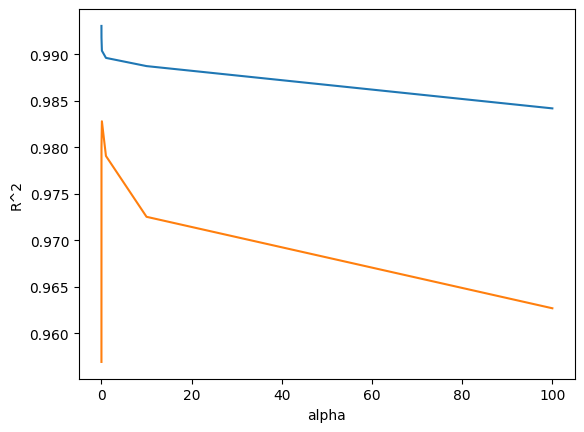

In [45]:
# 그래프 그리기
plt.plot(alpha_list, train_score) # alpha리스트의 값이 작으므로 그래프 왼쪽이 너무 촘촘함
plt.plot(alpha_list, test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

In [46]:
print(alpha_list)
print(np.log10(alpha_list))

[0.001, 0.01, 0.1, 1, 10, 100]
[-3. -2. -1.  0.  1.  2.]


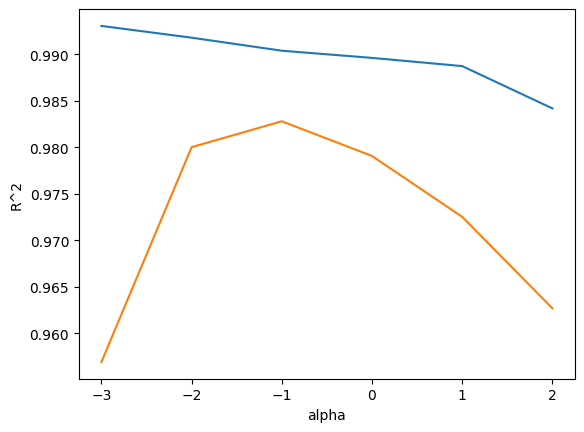

In [47]:
plt.plot(np.log10(alpha_list), train_score) # 로그함수 적용(0.001은 -3, 0.01은 -2와 같이 만듦)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

##### 해석
![image.png](attachment:image.png)
- 그래프의 왼쪽은 훈련 데이터셋과 테스트 데이터셋의 점수 차이가 큼(과대적합)
- 그래프의 오른쪽은 훈련 데이터셋과 테스트 데이터셋의 점수가 모두 낮아짐(과소적합)
- 적절한 alpha값은 두 그래프가 가장 가까운 지점(-1 => 0.1)
- 찾은 값을 alpha로 적용하여 최종 모델 훈련

In [48]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


##### 결과
- 훈련 데이터셋과 테스트 데이터셋의 점수가 모두 높음
- 과대적합과 과소적합 사이에서 균형을 맞추고 있다고 볼 수 있음

### 라쏘 회귀 확인
- 릿지를 사용할 때와 사용법은 비슷

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


##### 결과
- 점수가 릿지회귀만큼 좋음
- alpha값을 변경하여 라쏘 규제를 적용한 결과를 조정할 수 있다.

In [50]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 라쏘 모델을 생성
    lasso = Lasso(alpha=alpha)
    # 라쏘 모델을 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

- 발생한 경고는 라쏘 모델 동작 시 최적 계수를 찾기위해 반복 수행을 하는데 횟수 부족 시 발생함
- `lasso = Lasso(alpha=alpha, max_iter=10000)` max_iter옵션을 추가할 수 있음(여기선 큰 의미 없음)

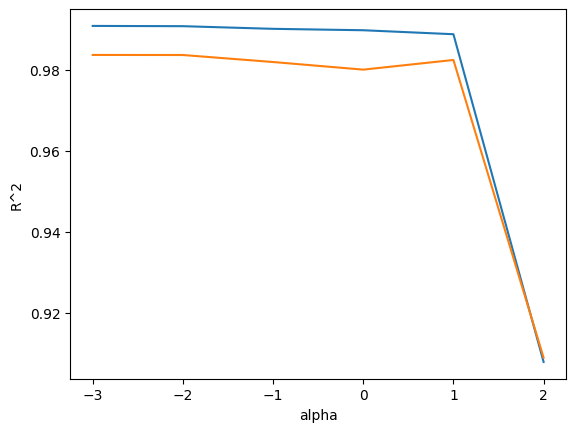

In [51]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9078632190121445
0.9089071866576978


##### 결과
![image.png](attachment:image.png)
- 왼쪽은 과대적합으로 보이고 오른쪽은 과소적합으로 보인다.
- 라쏘에서 최적 alpha값은 1이다.

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [52]:
lw = lasso.coef_
print(lw)
lb = lasso.intercept_
print(lb)

print('모델이 예측한 값:', lasso.predict([[-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
       -0.95745849, -0.93942079, -0.94342509, -0.94100107, -0.88757122,
       -0.88399964, -0.89100599, -0.87785292, -0.88311456, -0.88430909,
       -0.8691891 , -0.87259422, -0.87147928, -0.86603533, -0.82233944,
       -0.82171953, -0.8280588 , -0.81928269, -0.82512549, -0.8278857 ,
       -0.81486775, -0.82006923, -0.82177279, -0.82010716, -0.80835934,
       -0.81274154, -0.81321125, -0.8098514 , -0.80275974, -0.7637909 ,
       -0.76597773, -0.77150714, -0.76668667, -0.77246614, -0.77577893,
       -0.76571689, -0.77162398, -0.77472752, -0.77517751, -0.76290623,
       -0.76877311, -0.77148634, -0.77113383, -0.767785  , -0.75814062,
       -0.76376113, -0.76586966, -0.76449499, -0.75967179, -0.75143746]]))
y = 0
i = 0
for data in train_scaled[0]:
    y += lw[i] * data
    i += 1
y += lb
print(f'y =[{y}]')

[  0.           0.           0.           0.           0.50261219
   0.           0.           0.           0.           0.
   0.           0.          81.7197224  167.24554985   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
400.8333333333333
모델이 예측한 값: [180.92113629]
y =[180.92113620679362]


##### 결과
- 모델의 훈련이 잘 된 것으로 보임
- 릿지와 라쏘 모두 과대적합을 잘 억제하고 테스트 성능을 크게 높일 수 있음

In [ ]:
# 라쏘 모델은 계수를 0으로 만들 수 있음(coef_게 저장되어 있음)
print(np.sum(lasso.coef_ == 0)) # 라쏘 모델에서 계수가 0인 개수

40


- 라쏘 모델에 55개의 특성을 주입했으나 15개만 사용되어짐
- 라쏘를 이용하여 유용한 특성을 추려내는 용도로도 사용 가능